In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import F1Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Chargement des données

In [101]:
mnist = mnist.load_data()

In [102]:
# Chargement des données MNIST : Les données sont déjà divisées en ensembles d'entraînement et de test et sont prêtes à être utilisées. 
# Les images sont de taille 28x28 pixels et les étiquettes sont des chiffres de 0 à 9.

(X_train, y_train), (X_test, y_test) = mnist 

In [103]:
# Taille des données
print("Taille des données d'entraînement :", X_train.shape, y_train.shape) 
print("Taille des données de test :", X_test.shape, y_test.shape)

Taille des données d'entraînement : (60000, 28, 28) (60000,)
Taille des données de test : (10000, 28, 28) (10000,)


In [104]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

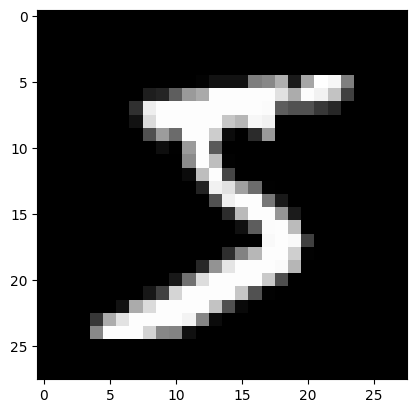

In [105]:
# voir image x_train[0] avec matplotlib
plt.imshow(X_train[0], cmap='gray')

### Normalisation des données

In [106]:
# Normalisation des données entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [107]:
X_train[0][15:20, 15:20]


array([[0.7294118 , 0.99215686, 0.99215686, 0.5882353 , 0.10588235],
       [0.0627451 , 0.3647059 , 0.9882353 , 0.99215686, 0.73333335],
       [0.        , 0.        , 0.9764706 , 0.99215686, 0.9764706 ],
       [0.50980395, 0.7176471 , 0.99215686, 0.99215686, 0.8117647 ],
       [0.99215686, 0.99215686, 0.99215686, 0.98039216, 0.7137255 ]],
      dtype=float32)

In [108]:
# Redimensionnement des données pour les adapter à l'entrée du modèle
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [109]:
# Conversion des étiquettes en format catégoriel
y_train = to_categorical(y_train, num_classes=10) # que 
y_test = to_categorical(y_test, num_classes=10)

Label de l'image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


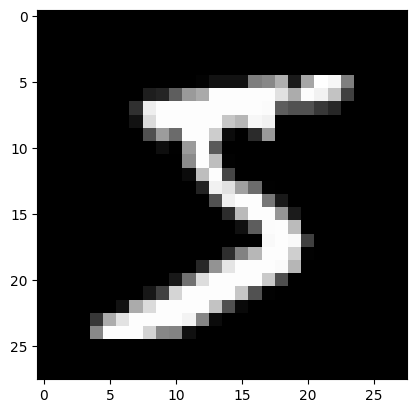

In [110]:
# Tracer la 1ere image de l'ensemble d'entraînement
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
print("Label de l'image :", y_train[0])  # Affiche le label de l'image

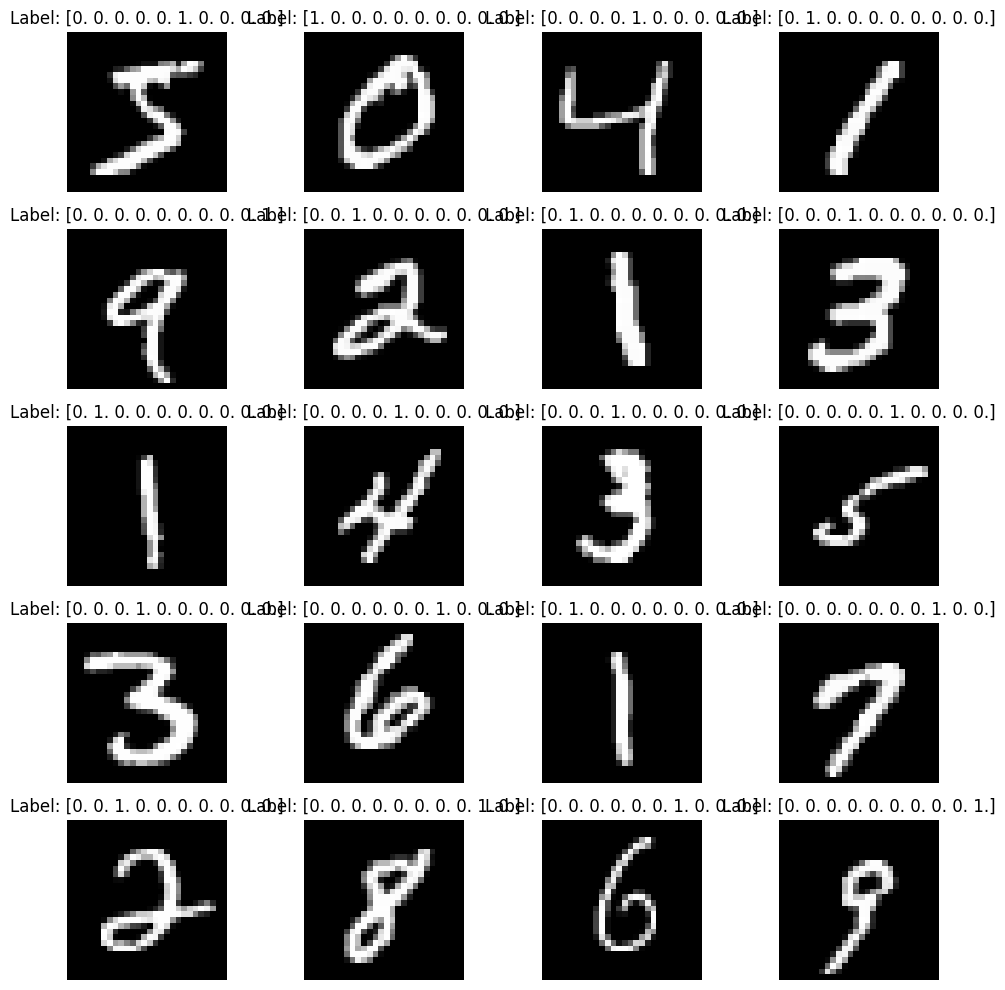

In [111]:
sample = 20
images = X_train[:sample]
fig = plt.figure(figsize=(10, 10))
for i in range(sample):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [112]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),  # Couche d'entrée
        Flatten(),  # Aplatit les données
        Dense(128, activation='relu'),  # Couche dense avec 128 neurones et activation ReLU
        Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones et activation softmax
    ]
)

In [113]:
model.summary()  # Affiche le résumé du modèle

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(
    loss='categorical_crossentropy',  # Fonction de perte pour la classification multi-classe
    optimizer='adam',  # Optimiseur Adam
    metrics=['accuracy']  # Métriques pour évaluer le modèle (précision)
)

### Ajustement du modele

In [115]:
# Ajustement du modèle
mymodel = model.fit(
    X_train, y_train,  # Données d'entraînement et étiquettes
    epochs=20,  # Nombre d'époques pour l'entraînement
    batch_size=600,  # Taille du lot pour l'entraînement
    verbose=1,  # Affiche les informations d'entraînement
    validation_split=0.2  # Fraction des données d'entraînement à utiliser pour la validation
)   

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6824 - loss: 1.1702 - val_accuracy: 0.9153 - val_loss: 0.3214
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.3136 - val_accuracy: 0.9329 - val_loss: 0.2438
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.2350 - val_accuracy: 0.9440 - val_loss: 0.2038
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.1901 - val_accuracy: 0.9502 - val_loss: 0.1810
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9537 - loss: 0.1677 - val_accuracy: 0.9563 - val_loss: 0.1588
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1439 - val_accuracy: 0.9575 - val_loss: 0.1485
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1282 - val_accuracy: 0.9612 - val_loss: 0.1381
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9689 - loss: 0.1135 - val_accuracy: 0.9649 - val_loss:

### Prédire les données de test

In [116]:
y_test_pred = model.predict(X_test)  # Prédictions sur l'ensemble de test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


In [117]:
pd.DataFrame(y_test_pred).head().round(2)  # Affiche les premières prédictions arrondies à 2 décimales

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.00
1,0.0,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.0,0.99,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,1.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,0.0,0.00,0.0,0.0,0.99,0.0,0.0,0.0,0.0,0.01


In [118]:
mysample = 0

print(y_test[mysample])  # Affiche l'étiquette réelle de l'échantillon
np.argmax(y_test_pred[mysample])  # Affiche l'étiquette prédite par le modèle


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


np.int64(7)

Text(0.5, 1.0, 'Label: 7, Predicted: 7')

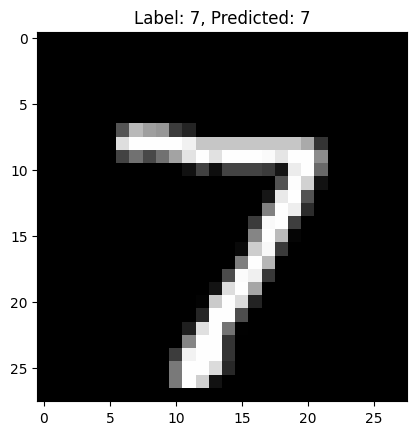

In [119]:
plt.imshow(X_test[mysample].reshape(28, 28), cmap='gray')  # Affiche l'image de l'échantillon
plt.title(f"Label: {np.argmax(y_test[mysample])}, Predicted: {np.argmax(y_test_pred[mysample])}")  # Affiche le label réel et la prédiction

#### Transformation les probabilités en modalité la plus vraisemblable

In [120]:
y_test_class = np.argmax(y_test, axis=1)  # Convertit les étiquettes de test en classes
y_test_pred_class = np.argmax(y_test_pred, axis=1)  # Convertit les prédictions en classes

In [121]:
res = pd.concat(
    [pd.DataFrame(y_test_class, columns=['Y']),
     pd.DataFrame(y_test_pred_class, columns=['Ypred'])],
    axis=1
)
res

,Y,Ypred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


### Evaluation du modèle

In [122]:
# evaluation du modèle
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_test_pred_class))  # Affiche le rapport de classification
print(confusion_matrix(y_test_class, y_test_pred_class))  # Affiche la matrice de confusion

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 970    0    1    1    2    2    1    1    2    0]
 [   0 1124    4    0    0    1    2    0    4    0]
 [   4    1  995    5    3    0    3    9   12    0]
 [   0    0    2  989    0    5    0    4    6    4]
 [   2    0    4    1  953   

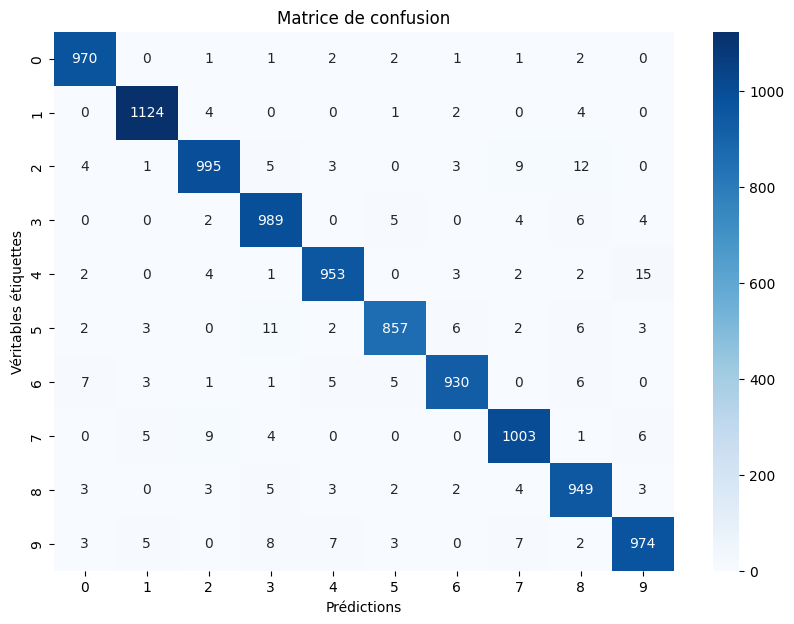

In [123]:
# Tracer la matrice de confusion
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_class, y_test_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


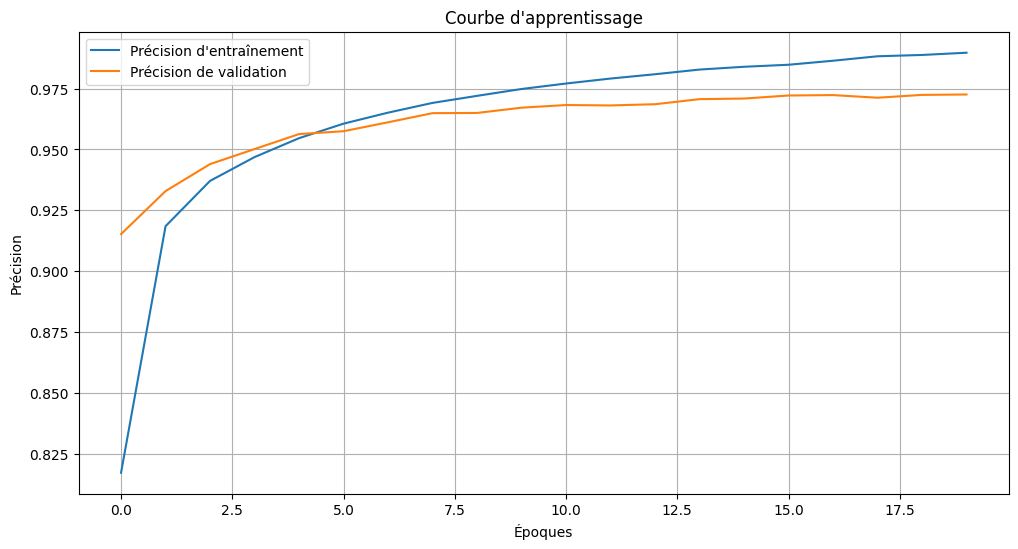

In [124]:
# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 6))
plt.plot(mymodel.history['accuracy'], label='Précision d\'entraînement')
plt.plot(mymodel.history['val_accuracy'], label='Précision de validation')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

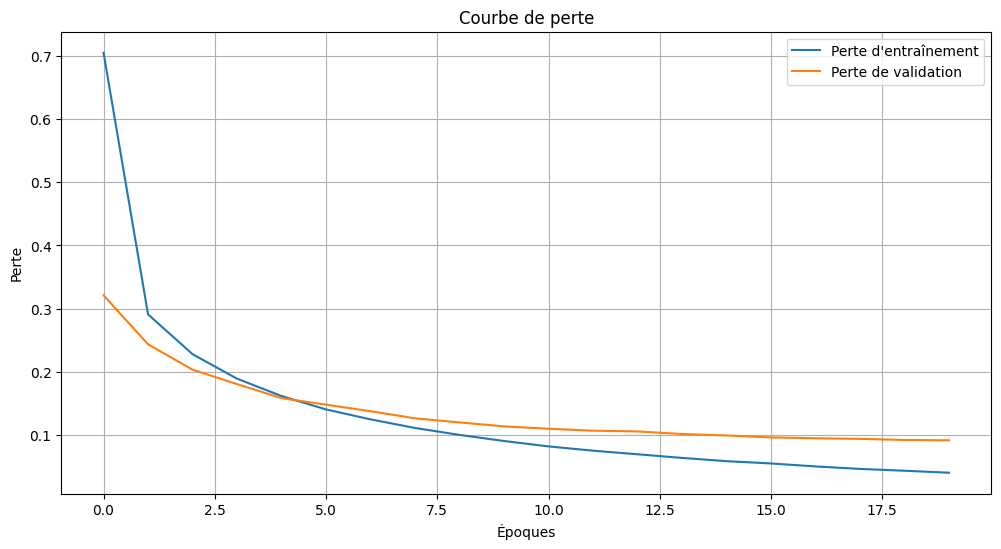

In [125]:
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.plot(mymodel.history['loss'], label='Perte d\'entraînement')
plt.plot(mymodel.history['val_loss'], label='Perte de validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()